# Autoencoders

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("/Users/ilabuser/Desktop/Praveen/numerai_datasets/numerai_training_data.csv")

In [3]:
train_data = train_data.drop(['target'], 1)

In [4]:
col_max = train_data.apply(max, axis=0)
col_min = train_data.apply(min, axis=0)

In [5]:
print zip(col_min,col_max)

[(0.0, 0.92993950236301703), (0.029106929345048799, 1.0), (0.00819105781846312, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.99532287571716205), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]


* All the features are in the range [0,1], decided not to normalize the features

In [6]:
corr = train_data.corr()

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

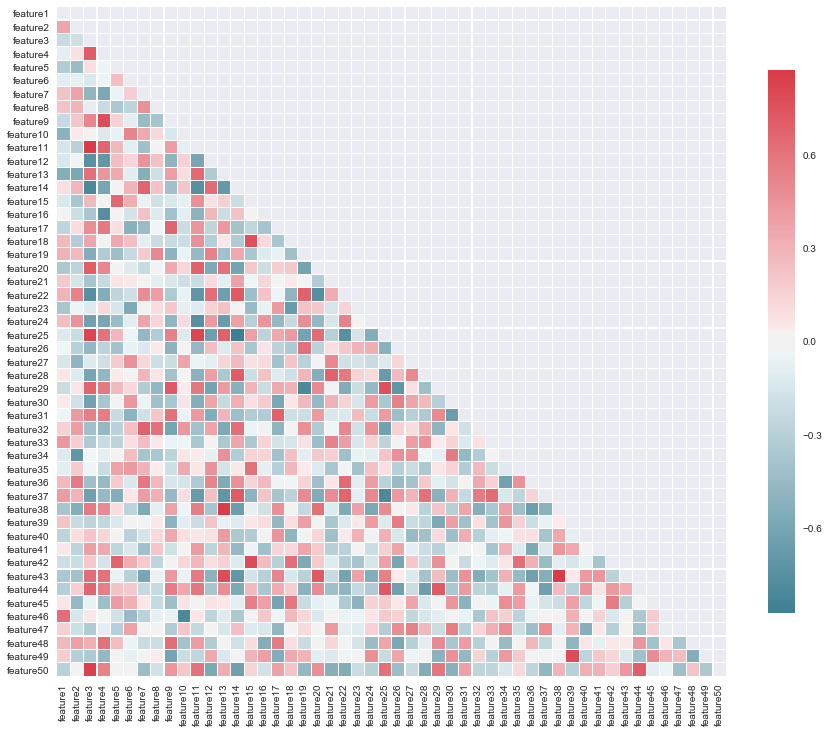

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=0.1, 
            cbar_kws={"shrink": .5}, ax=ax)

# PCA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [10]:
svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5, svd_solver=svd_solver)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004662337
PCA Reconstruction loss( full ) :  0.004662337
PCA Reconstruction loss( arpack ) :  0.004662337
PCA Reconstruction loss( randomized ) :  0.004662337


In [11]:
svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5, svd_solver=svd_solver, whiten=True)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004662337
PCA Reconstruction loss( full ) :  0.004662337
PCA Reconstruction loss( arpack ) :  0.004662337
PCA Reconstruction loss( randomized ) :  0.004662337


* Different solvers with or without whiten are giving the same result

# KernelPCA
** Discarding KPCA as it runs out of memory

In [ ]:
#from sklearn.decomposition import KernelPCA

In [ ]:
'''kpca = KernelPCA(n_components=5,kernel="rbf", gamma=10, n_jobs=-1)
kpca_encomp = kpca.fit_transform(train_data)
kpca_decomp = kpca.inverse_transform(kpca_encomp)
kpca_recon_loss = mean_squared_error(train_data, kpca_decomp)
print "KPCA Reconstruction loss: ", kpca_recon_loss'''

# SparsePCA

from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=5,n_jobs=-1,verbose=True, method='cd')
spca_encomp = spca.fit_transform(train_data)

spca_decomp = np.dot(spca_encomp, spca.components_)
spca_recon_loss = mean_squared_error(train_data, spca_decomp)
print "SparsePCA Reconstruction loss: ", spca_recon_loss

# Single Layer Autoencoder

In [12]:
# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 128
display_step = 10

In [13]:
# Network Parameters
n_hidden_1 = 5 # 1st layer num features
n_input = 50    # input num features

In [14]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [15]:
weights_s = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'decoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_input)), name="w_d_h1")
}
biases_s = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_input]),  name="b_d_h1"), 'float64')
}

In [16]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights_s['encoder_h1'])
tf.summary.histogram("w_d_h1_summ", weights_s['decoder_h1'])

<tf.Tensor 'w_d_h1_summ:0' shape=() dtype=string>

In [17]:
def construct_train(act_fun):
    # Construct model
    encoder_op = encoder(X)
    decoder_op = decoder(encoder_op)
    
    # Prediction using sigmoid
    y_sig_pred = decoder_op
    # Targets (Labels) are the input data.
    y_true = X
    
    # Define loss and optimizer, minimize the squared error
    with tf.name_scope("cost"+act_fun):
        cost = tf.reduce_mean(tf.pow(y_true - y_sig_pred, 2))
        train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
        # Add scalar summary for cost tensor
        tf.summary.scalar("cost"+act_fun, cost)
    
    # Initializing the variables
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        writer = tf.summary.FileWriter("./logs/autoencoder_logs", sess.graph)
        merged = tf.summary.merge_all()

        sess.run(init)
        total_batch = int(len(train_data)/batch_size)

        # Training cycle
        for epoch in xrange(training_epochs):
        # Loop over all batches
            for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
                batch_xs = train_data[start:end]

                _, c_sig, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})

            writer.add_summary(summary, epoch)
            # Display logs per epoch step
            if epoch % display_step == 0 or epoch+1 == training_epochs:
                print("Epoch:", '%04d' % (epoch+1), 
                      ("cost_"+act_fun+"="+"{:.9f}".format(c_sig)))

        recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

In [18]:
# Building the encoder with sigmoid activation function
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights_s['encoder_h1']),
                                                    biases_s['encoder_b1']))
    return layer_1

# Building the decoder with sigmoid activation function
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights_s['decoder_h1']),
                                                    biases_s['decoder_b1']))
    return layer_1

#Construct the graph and Train
construct_train('sigmoid')

('Epoch:', '0001', 'cost_sigmoid=0.005524954')
('Epoch:', '0011', 'cost_sigmoid=0.004897565')
('Epoch:', '0020', 'cost_sigmoid=0.005097921')


In [19]:
# Building the encoder with softmax activation function
def encoder(x):
# Encoder Hidden layer
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.softmax(tf.add(tf.matmul(x, weights_s['encoder_h1']),
                                                    biases_s['encoder_b1']))
    return layer_1

# Building the decoder
def decoder(x):
# Encoder Hidden layer
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.softmax(tf.add(tf.matmul(x, weights_s['decoder_h1']),
                                                    biases_s['decoder_b1']))
    return layer_1

#Construct the graph and Train
construct_train('softmax')

('Epoch:', '0001', 'cost_softmax=0.248796417')
('Epoch:', '0011', 'cost_softmax=0.247943475')
('Epoch:', '0020', 'cost_softmax=0.247925676')


In [20]:
# Building the encoder with relu activation function
def encoder(x):
# Encoder Hidden layer
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights_s['encoder_h1']),
                                                    biases_s['encoder_b1']))
    return layer_1

# Building the decoder with relu activation function
def decoder(x):
# Encoder Hidden layer
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights_s['decoder_h1']),
                                                    biases_s['decoder_b1']))
    return layer_1

#Construct the graph and Train
construct_train('relu')

('Epoch:', '0001', 'cost_relu=0.007488032')
('Epoch:', '0011', 'cost_relu=0.006655227')
('Epoch:', '0020', 'cost_relu=0.008275108')


# Stacked Auto-encoders

In [27]:
# Parameters
learning_rate = 0.01
training_epochs = 260
batch_size = 128
display_step = 10

In [10]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [11]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [12]:
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3"),
'decoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_3, n_hidden_2)), name="w_d_h1"),
'decoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_1)), name="w_d_h2"),
'decoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_input)),    name="w_d_h3")
}
biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [13]:
#Add histogram summaries for weights

tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

<tf.Tensor 'w_d_h3_summ:0' shape=() dtype=string>

In [14]:
# Building the encoder
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']))
# Encoder Hidden layer with sigmoid activation #2
    with tf.name_scope("en_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                                          biases['encoder_b2']))
# Encoder Hidden layer with sigmoid activation #3
    with tf.name_scope("en_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                                          biases['encoder_b3']))
    return layer_3

In [15]:
# Building the decoder
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                                          biases['decoder_b2']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                                          biases['decoder_b3']))
    return layer_3


In [16]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [17]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [18]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

In [19]:
# Initializing the variables
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/autoencoder_logs", sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init)
    total_batch = int(len(train_data)/batch_size)
    
    # Training cycle
    for epoch in xrange(training_epochs):
    # Loop over all batches
        for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
            batch_xs = train_data[start:end]
            
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})
        
        writer.add_summary(summary, epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0 or epoch+1 == training_epochs:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(c))
            
    recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

('Epoch:', '0001', 'cost=', '0.019040789')
('Epoch:', '0011', 'cost=', '0.012119118')
('Epoch:', '0021', 'cost=', '0.011697255')
('Epoch:', '0031', 'cost=', '0.006929284')
('Epoch:', '0041', 'cost=', '0.006517318')
('Epoch:', '0051', 'cost=', '0.005803155')
('Epoch:', '0061', 'cost=', '0.004496195')
('Epoch:', '0071', 'cost=', '0.004031498')
('Epoch:', '0081', 'cost=', '0.004019632')
('Epoch:', '0091', 'cost=', '0.003887405')
('Epoch:', '0101', 'cost=', '0.003723035')
('Epoch:', '0111', 'cost=', '0.003469574')
('Epoch:', '0121', 'cost=', '0.003508724')
('Epoch:', '0131', 'cost=', '0.003507162')
('Epoch:', '0141', 'cost=', '0.003516476')
('Epoch:', '0151', 'cost=', '0.003504138')
('Epoch:', '0161', 'cost=', '0.003359840')
('Epoch:', '0171', 'cost=', '0.003312447')
('Epoch:', '0181', 'cost=', '0.003367678')
('Epoch:', '0191', 'cost=', '0.003439590')
('Epoch:', '0201', 'cost=', '0.003397699')
('Epoch:', '0211', 'cost=', '0.003436469')
('Epoch:', '0221', 'cost=', '0.003441885')
('Epoch:', 

In [29]:
len(recon_ip)

136573

In [30]:
len(train_data.values)

136573

In [31]:
recon_ip_df = pd.DataFrame(recon_ip)
reduced_ip_df = pd.DataFrame(reduced_ip)

In [32]:
recon_ip_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.438373,0.416284,0.407934,0.367605,0.413568,0.662149,0.611660,0.641222,0.319688,0.700661,...,0.627981,0.470676,0.392194,0.412804,0.551423,0.338275,0.727390,0.301303,0.530102,0.391006
1,0.288364,0.432747,0.501231,0.469517,0.462675,0.592019,0.477265,0.478219,0.617569,0.719166,...,0.463836,0.541874,0.608283,0.618350,0.484871,0.319298,0.594135,0.337925,0.409834,0.527938
2,0.571074,0.585038,0.608664,0.682946,0.392483,0.494591,0.371073,0.522827,0.626785,0.400203,...,0.654306,0.409025,0.565420,0.578368,0.439526,0.623820,0.533269,0.663392,0.503250,0.552283
3,0.558743,0.479818,0.467723,0.590409,0.306730,0.458002,0.352182,0.510352,0.557929,0.397701,...,0.659806,0.263016,0.605086,0.405387,0.426216,0.649870,0.643638,0.502490,0.526420,0.439336
4,0.534808,0.491013,0.616304,0.609267,0.311973,0.544914,0.427970,0.529415,0.561900,0.534740,...,0.629889,0.398538,0.582057,0.519918,0.476402,0.555997,0.656096,0.489970,0.432018,0.561222
5,0.507031,0.431707,0.602839,0.367310,0.605959,0.432755,0.532840,0.578992,0.465708,0.386872,...,0.478892,0.734345,0.419597,0.514503,0.615454,0.612234,0.375512,0.511400,0.603893,0.530910
6,0.564480,0.408307,0.291201,0.234211,0.344654,0.414726,0.542570,0.583979,0.359603,0.446557,...,0.490825,0.484002,0.493962,0.354225,0.650453,0.679855,0.608720,0.192502,0.737320,0.293103
7,0.523217,0.546206,0.410325,0.475638,0.351741,0.437828,0.422617,0.574838,0.489732,0.435938,...,0.648162,0.347166,0.523321,0.461036,0.469728,0.616382,0.525184,0.430723,0.622280,0.446552
8,0.449732,0.403869,0.744466,0.492697,0.514520,0.422397,0.504265,0.575903,0.583329,0.482371,...,0.498625,0.654507,0.614773,0.581787,0.504610,0.548880,0.408979,0.522139,0.404759,0.630154
9,0.281520,0.431826,0.788064,0.758590,0.546075,0.488679,0.367317,0.566144,0.759031,0.607051,...,0.623876,0.455651,0.815162,0.688281,0.293767,0.317960,0.477277,0.659716,0.270317,0.647593


In [33]:
pd.DataFrame(train_data[0:4])

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,0.406544,0.446282,0.391557,0.367915,0.394000,0.645786,0.412648,0.612024,0.280566,0.656772,...,0.645538,0.402367,0.403089,0.417718,0.569705,0.333967,0.800747,0.305381,0.626881,0.430329
1,0.354021,0.376411,0.482908,0.413099,0.431805,0.615614,0.402103,0.679637,0.541565,0.698312,...,0.392585,0.536498,0.647950,0.593725,0.477672,0.412486,0.799000,0.304652,0.381010,0.481293
2,0.597742,0.589638,0.586671,0.698624,0.378669,0.502805,0.358681,0.468242,0.613455,0.409177,...,0.686596,0.452612,0.463369,0.569285,0.420881,0.640063,0.532517,0.686908,0.512719,0.494701
3,0.567255,0.483598,0.446437,0.610422,0.273251,0.506418,0.227988,0.475163,0.512028,0.425867,...,0.721268,0.187605,0.549623,0.441612,0.447807,0.653687,0.701394,0.572340,0.468844,0.480344


In [34]:
pd.DataFrame(reduced_ip)

,0,1,2,3,4
0,0.056911,0.526424,0.422202,0.515047,0.217883
1,0.110230,0.105683,0.143346,0.272435,0.676104
2,0.489234,0.116171,0.524543,0.185204,0.649118
3,0.445433,0.026826,0.443997,0.474838,0.593547
4,0.929665,0.219481,0.545480,0.677958,0.620562
5,0.436948,0.517044,0.058375,0.259501,0.363861
6,0.206804,0.045281,0.143983,0.956809,0.277444
7,0.342681,0.062524,0.281996,0.431485,0.399591
8,0.808255,0.450012,0.088425,0.228871,0.685074
9,0.391430,0.391055,0.199858,0.034749,0.967296
